In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import glob
%matplotlib inline

In [3]:
db = pd.read_csv("C:\\Users\\Sathishwaran007\\Downloads\\Project\\DDW_B18_0800_NIC_FINAL_STATE_RAJASTHAN-2011.csv", encoding = 'ISO-8859-1')
db

af = glob.glob("C:/Users/Sathishwaran007/Downloads/Project/*.csv")
af

list_db = []
for csvfile in af:
    try:
        df = pd.read_csv(csvfile)
        list_db.append(db)
    except Exception as e:
        print(f"Error reading {csvfile}: {e}")

Error reading C:/Users/Sathishwaran007/Downloads/Project\DDW_B18sc_0700_NIC_FINAL_STATE_NCT_OF_DELHI-2011.csv: 'utf-8' codec can't decode byte 0x92 in position 17618: invalid start byte
Error reading C:/Users/Sathishwaran007/Downloads/Project\DDW_B18sc_2000_NIC_FINAL_STATE_JHARKHAND-2011.csv: 'utf-8' codec can't decode byte 0x92 in position 19308: invalid start byte
Error reading C:/Users/Sathishwaran007/Downloads/Project\DDW_B18sc_2400_NIC_FINAL_STATE_GUJARAT-2011.csv: 'utf-8' codec can't decode byte 0x92 in position 17891: invalid start byte
Error reading C:/Users/Sathishwaran007/Downloads/Project\DDW_B18sc_2700_NIC_FINAL_STATE_MAHARASHTRA-2011.csv: 'utf-8' codec can't decode byte 0x92 in position 20268: invalid start byte
Error reading C:/Users/Sathishwaran007/Downloads/Project\DDW_B18sc_2900_NIC_FINAL_STATE_KARNATAKA-2011.csv: 'utf-8' codec can't decode byte 0x92 in position 21519: invalid start byte
Error reading C:/Users/Sathishwaran007/Downloads/Project\DDW_B18sc_3200_NIC_FINAL_

In [4]:
num_csv_files = len(af)
print(f"Number of CSV files to merge: {num_csv_files}")

df= pd.concat(list_db, ignore_index=True)
df.shape

Number of CSV files to merge: 24


(86648, 25)

In [5]:
#Removing special Characters, Unwanted spaces, extra__ etc 
df = df.replace(r'[^a-zA-Z0-9\s]', '', regex=True)
df.columns = df.columns.str.replace(' - ', '_').str.replace(' ', '_')
df.columns = df.columns.str.replace('__', '_')
df.columns = df.columns.str.strip()
df.columns = df.columns.str.replace(' ', '_')


In [6]:
df.head()

,State_Code,District_Code,India/States,Division,Group,Class,NIC_Name,Main_Workers_Total_Persons,Main_Workers_Total_Males,Main_Workers_Total_Females,...,Main_Workers_Urban_Females,Marginal_Workers_Total_Persons,Marginal_Workers_Total_Males,Marginal_Workers_Total_Females,Marginal_Workers_Rural_Persons,Marginal_Workers_Rural_Males,Marginal_Workers_Rural_Females,Marginal_Workers_Urban_Persons,Marginal_Workers_Urban_Males,Marginal_Workers_Urban_Females
0,08,000,STATE RAJASTHAN,00,000,0000,Total,9017944,7594737,1423207,...,618445,2307752,1046813,1260939,1825830,749381,1076449,481922,297432,184490
1,08,000,STATE RAJASTHAN,01,000,0000,Crop and animal production hunting and related...,450766,201572,249194,...,19810,408728,76106,332622,390864,71124,319740,17864,4982,12882
2,08,000,STATE RAJASTHAN,01,011,0000,Growing of nonperennial crops,12876,10547,2329,...,1013,9562,4051,5511,8147,3295,4852,1415,756,659
3,08,000,STATE RAJASTHAN,01,011,0111,Growing of cereals except rice leguminous crop...,12061,9911,2150,...,942,9085,3883,5202,7777,3161,4616,1308,722,586
4,08,000,STATE RAJASTHAN,01,011,0112,Growing of rice,79,71,8,...,2,13,4,9,11,2,9,2,2,0


In [10]:
# Drop duplicate rows
df = df.drop_duplicates()

print(f"Data shape after dropping duplicates: {df.shape}")

Data shape after dropping duplicates: (21662, 25)


In [11]:
df.to_csv('output_file.csv', index=False)

Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
Index: 21662 entries, 0 to 21661
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   State_Code                      21662 non-null  object
 1   District_Code                   21662 non-null  object
 2   India/States                    21662 non-null  object
 3   Division                        21662 non-null  object
 4   Group                           21662 non-null  object
 5   Class                           21662 non-null  object
 6   NIC_Name                        21662 non-null  object
 7   Main_Workers_Total_Persons      21662 non-null  int64 
 8   Main_Workers_Total_Males        21662 non-null  int64 
 9   Main_Workers_Total_Females      21662 non-null  int64 
 10  Main_Workers_Rural_Persons      21662 non-null  int64 
 11  Main_Workers_Rural_Males        21662 non-null  int64 
 12  Main_Workers_Rural_Females      2

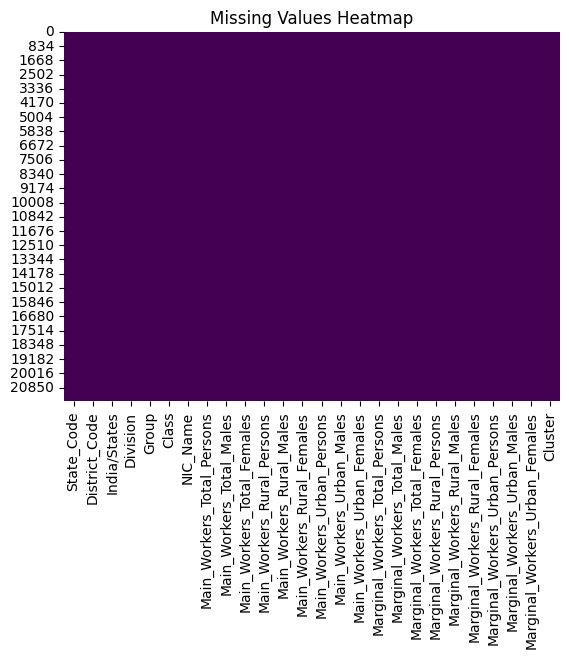


Cluster Centers:
[[-2.33418921e-02 -2.28823706e-02 -2.45034155e-02 -2.43041331e-02
  -2.38383491e-02 -2.42250898e-02 -2.20955071e-02 -2.17389311e-02
  -2.33515640e-02 -2.50970662e-02 -2.42359909e-02 -2.46732232e-02
  -2.49365750e-02 -2.44498524e-02 -2.42380038e-02 -2.38662584e-02
  -2.31496764e-02 -2.41296312e-02]
 [ 1.35849670e+02  1.35262707e+02  1.31758911e+02  1.35233680e+02
   1.34684529e+02  1.26086044e+02  1.34679154e+02  1.34295714e+02
   1.31220968e+02  1.28444317e+02  1.30497386e+02  1.21290528e+02
   1.25431650e+02  1.29688860e+02  1.17681939e+02  1.30802664e+02
   1.29582489e+02  1.27937093e+02]
 [ 3.47470702e+00  1.82614039e+00  1.18614881e+01  6.01885534e+00
   2.96968524e+00  1.85066145e+01  9.39548127e-01  7.42515149e-01
   2.12220518e+00  2.00891518e+01  8.39792607e+00  2.82391581e+01
   2.39761241e+01  1.09679311e+01  3.12262138e+01  3.23945394e+00
   1.73823806e+00  5.50989185e+00]
 [ 3.90595290e+00  3.84909222e+00  3.99617857e+00  4.07244656e+00
   4.11187478e+00  

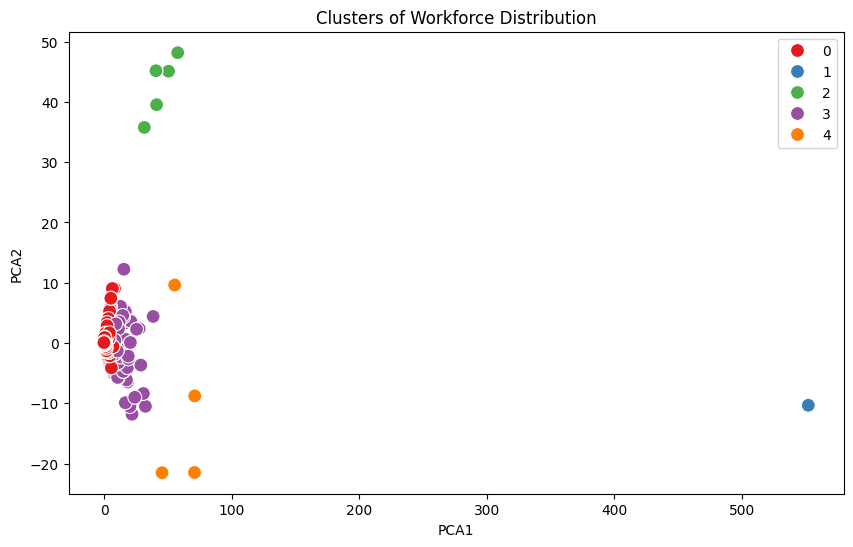

Silhouette Score: 0.9823721478533486


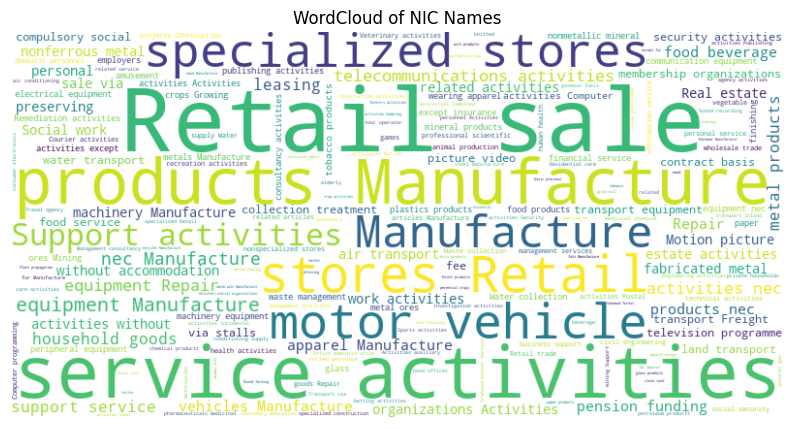

C:\Users\Sathishwaran007\AppData\Local\Temp\ipykernel_28180\1440403226.py:95: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Cluster', data=df, palette='Set2')


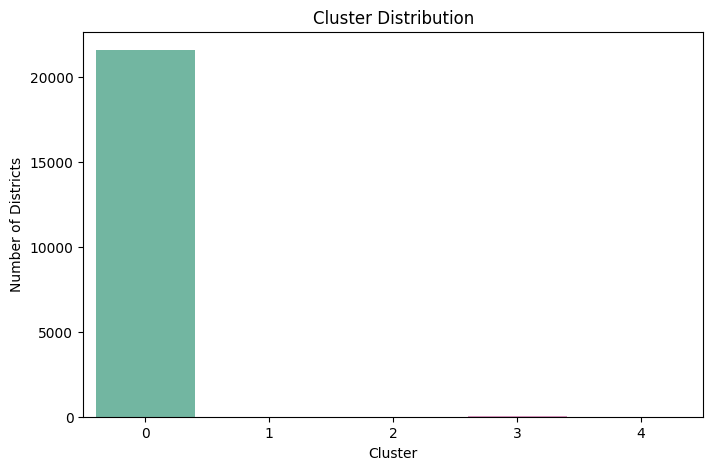

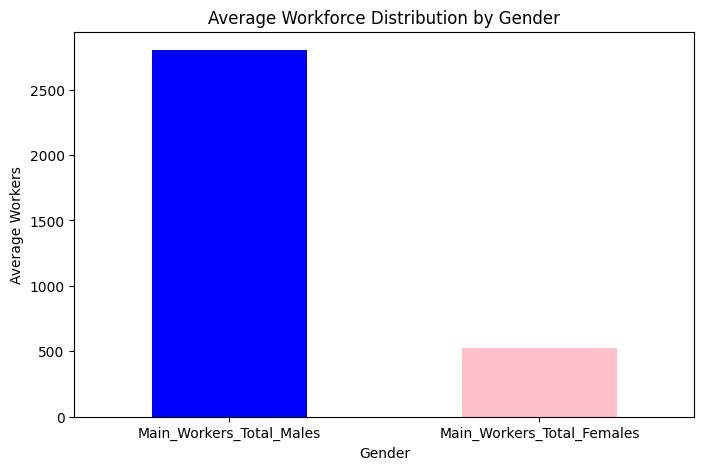

Clustered data saved to 'clustered_workforce_data.csv'


In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import silhouette_score


print("Dataset Overview:")
print(df.info())
print("\nSummary Statistics:")
print(df.describe())

# Check for missing values
missing_values = df.isnull().sum()
print("\nMissing Values:")
print(missing_values)

# Visualize missing values
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values Heatmap")
plt.show()

# Step 2: Feature Engineering
# Select numerical columns for clustering
numerical_cols = [
    'Main_Workers_Total_Persons', 'Main_Workers_Total_Males', 'Main_Workers_Total_Females',
    'Main_Workers_Rural_Persons', 'Main_Workers_Rural_Males', 'Main_Workers_Rural_Females',
    'Main_Workers_Urban_Persons', 'Main_Workers_Urban_Males', 'Main_Workers_Urban_Females',
    'Marginal_Workers_Total_Persons', 'Marginal_Workers_Total_Males', 'Marginal_Workers_Total_Females',
    'Marginal_Workers_Rural_Persons', 'Marginal_Workers_Rural_Males', 'Marginal_Workers_Rural_Females',
    'Marginal_Workers_Urban_Persons', 'Marginal_Workers_Urban_Males', 'Marginal_Workers_Urban_Females'
]

# Handle missing values
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].mean())

# Normalize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[numerical_cols])

# Step 3: Clustering
# Use KMeans to find clusters
kmeans = KMeans(n_clusters=5, random_state=42)  # Adjust clusters as needed
clusters = kmeans.fit_predict(scaled_data)

# Add cluster labels to the dataset
df['Cluster'] = clusters
print("\nCluster Centers:")
print(kmeans.cluster_centers_)

# Visualize the clusters
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(scaled_data)
df['PCA1'] = reduced_data[:, 0]
df['PCA2'] = reduced_data[:, 1]

plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=df, palette='Set1', s=100)
plt.title("Clusters of Workforce Distribution")
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.legend()
plt.show()

# Silhouette score
silhouette_avg = silhouette_score(scaled_data, clusters)
print(f"Silhouette Score: {silhouette_avg}")

# Step 4: NLP Analysis on 'NIC_Name'
# Preprocess text data
df['NIC_Name'] = df['NIC_Name'].fillna('Unknown')

# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=100)
tfidf_matrix = tfidf_vectorizer.fit_transform(df['NIC_Name'])

# Generate WordCloud
text = " ".join(df['NIC_Name'])
wordcloud = WordCloud(background_color='white', width=800, height=400).generate(text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("WordCloud of NIC Names")
plt.show()

# Step 5: Visualization
# Distribution of Clusters
plt.figure(figsize=(8, 5))
sns.countplot(x='Cluster', data=df, palette='Set2')
plt.title("Cluster Distribution")
plt.xlabel("Cluster")
plt.ylabel("Number of Districts")
plt.show()

# Workforce Distribution by Gender
gender_cols = ['Main_Workers_Total_Males', 'Main_Workers_Total_Females']
df_gender = df[gender_cols].mean()

plt.figure(figsize=(8, 5))
df_gender.plot(kind='bar', color=['blue', 'pink'])
plt.title("Average Workforce Distribution by Gender")
plt.xlabel("Gender")
plt.ylabel("Average Workers")
plt.xticks(rotation=0)
plt.show()

# Step 6: Save Results
df.to_csv('clustered_workforce_data.csv', index=False)
print("Clustered data saved to 'clustered_workforce_data.csv'")
